In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [2]:
#path ='file/'
path = '../input/'
state_ts = pd.read_csv('../zecon/State_time_series.csv',parse_dates=['Date'])
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (13212, 82)


In [3]:
state_ts.tail()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
13207,2017-12-31,Virginia,NaN,39599.0,36664.0,242.105263,146.157362,143.816452,147.329650,153.763978,...,133500.0,291300.0,246200.0,237300.0,492700.0,1538.0,1500.0,0.948,1738.0,1441.0
13208,2017-12-31,Washington,NaN,17918.0,15109.0,304.291151,220.017256,195.881979,188.990826,201.271186,...,208200.0,337600.0,351300.0,352800.0,662700.0,1842.0,1803.0,1.132,1690.0,1828.0
13209,2017-12-31,WestVirginia,NaN,9800.0,9422.0,119.723429,77.764277,89.272003,93.071172,88.122881,...,63800.0,115100.0,103500.0,103300.0,174300.0,858.0,858.0,0.674,846.0,858.0
13210,2017-12-31,Wisconsin,NaN,27273.0,23370.0,145.664583,129.727412,127.136334,116.753927,95.573529,...,107200.0,158700.0,169300.0,170200.0,280600.0,1179.0,1153.0,0.920,1068.0,1163.0
13211,2017-12-31,Wyoming,NaN,4337.0,3992.0,172.943376,148.544590,137.093704,147.855347,153.846154,...,140400.0,195600.0,200200.0,200500.0,315900.0,1144.0,1115.0,0.902,1023.0,1120.0


In [4]:
# Analysis
print('Date range:{} to {}'.format(state_ts['Date'].min(),state_ts['Date'].max()))
print('Number of States',state_ts['RegionName'].nunique())

Date range:1996-04-30 00:00:00 to 2017-12-31 00:00:00
Number of States 52


In [5]:
state_ts=state_ts[(state_ts['Date'] > '2010-01-01') & (state_ts['Date'] < '2020-02-01')]
#state_ts.loc['2010-01-01':'2020-12-01']

In [6]:
# Analysis
print('Date range:{} to {}'.format(state_ts['Date'].min(),state_ts['Date'].max()))
print('Number of States',state_ts['RegionName'].nunique())

Date range:2010-01-31 00:00:00 to 2017-12-31 00:00:00
Number of States 52


In [7]:
# filter to a particular state
state_ts_f=state_ts.loc[state_ts['RegionName']=='Georgia']

In [8]:
state_ts_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 8231 to 13171
Data columns (total 82 columns):
Date                                                             96 non-null datetime64[ns]
RegionName                                                       96 non-null object
DaysOnZillow_AllHomes                                            95 non-null float64
InventorySeasonallyAdjusted_AllHomes                             96 non-null float64
InventoryRaw_AllHomes                                            96 non-null float64
MedianListingPricePerSqft_1Bedroom                               96 non-null float64
MedianListingPricePerSqft_2Bedroom                               96 non-null float64
MedianListingPricePerSqft_3Bedroom                               96 non-null float64
MedianListingPricePerSqft_4Bedroom                               96 non-null float64
MedianListingPricePerSqft_5BedroomOrMore                         96 non-null float64
MedianListingPricePerSqft_AllHomes 

In [9]:
#state_ts_f=state_ts_f.set_index('Date')

In [10]:
state_ts_f.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
8231,2010-01-31,Georgia,152.00,93675.0,88378.0,157.461868,97.442681,89.135579,96.374815,110.942576,...,78900.0,132900.0,135200.0,135400.0,255100.0,NaN,NaN,NaN,NaN,NaN
8283,2010-02-28,Georgia,150.25,93849.0,90628.0,157.142857,97.128378,89.285714,96.733871,110.389610,...,78300.0,132300.0,134600.0,134800.0,253000.0,NaN,NaN,NaN,NaN,NaN
8335,2010-03-31,Georgia,149.00,94591.0,93476.0,156.650246,97.942048,89.154930,96.774194,110.469116,...,77800.0,131600.0,133900.0,133800.0,251500.0,NaN,NaN,NaN,NaN,NaN
8387,2010-04-30,Georgia,148.75,95102.0,97603.0,159.337534,100.095420,89.225589,96.877341,110.521909,...,77800.0,131200.0,133400.0,133300.0,250400.0,NaN,NaN,NaN,NaN,NaN
8439,2010-05-31,Georgia,141.25,94498.0,95194.0,156.079665,99.206349,87.939698,95.560596,109.352562,...,77800.0,130800.0,132900.0,132900.0,249900.0,NaN,NaN,NaN,NaN,NaN


In [11]:
state_month = state_ts_f.resample('M',on='Date').mean()
state_month = state_month.reset_index()
state_month.shape

(96, 81)

In [12]:
# Sample data by region name
state_vise = state_ts_f.groupby(['RegionName']).mean()
state_vise.shape

(1, 80)

In [13]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [14]:
state_ts_f.columns

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

In [15]:
print(state_ts_f.head())

           Date RegionName  DaysOnZillow_AllHomes  \
8231 2010-01-31    Georgia                 152.00   
8283 2010-02-28    Georgia                 150.25   
8335 2010-03-31    Georgia                 149.00   
8387 2010-04-30    Georgia                 148.75   
8439 2010-05-31    Georgia                 141.25   

      InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
8231                               93675.0                88378.0   
8283                               93849.0                90628.0   
8335                               94591.0                93476.0   
8387                               95102.0                97603.0   
8439                               94498.0                95194.0   

      MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
8231                          157.461868                           97.442681   
8283                          157.142857                           97.128378   
8335                      

In [16]:
state_ts_f.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
8231,2010-01-31,Georgia,152.00,93675.0,88378.0,157.461868,97.442681,89.135579,96.374815,110.942576,...,78900.0,132900.0,135200.0,135400.0,255100.0,NaN,NaN,NaN,NaN,NaN
8283,2010-02-28,Georgia,150.25,93849.0,90628.0,157.142857,97.128378,89.285714,96.733871,110.389610,...,78300.0,132300.0,134600.0,134800.0,253000.0,NaN,NaN,NaN,NaN,NaN
8335,2010-03-31,Georgia,149.00,94591.0,93476.0,156.650246,97.942048,89.154930,96.774194,110.469116,...,77800.0,131600.0,133900.0,133800.0,251500.0,NaN,NaN,NaN,NaN,NaN
8387,2010-04-30,Georgia,148.75,95102.0,97603.0,159.337534,100.095420,89.225589,96.877341,110.521909,...,77800.0,131200.0,133400.0,133300.0,250400.0,NaN,NaN,NaN,NaN,NaN
8439,2010-05-31,Georgia,141.25,94498.0,95194.0,156.079665,99.206349,87.939698,95.560596,109.352562,...,77800.0,130800.0,132900.0,132900.0,249900.0,NaN,NaN,NaN,NaN,NaN


In [17]:
state_ts_f=state_ts_f.reset_index()

In [18]:
state_ts_f.describe()

,index,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,96.000000,95.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,10701.000000,104.910526,67628.062500,67658.760417,155.594758,92.910298,81.898381,91.762256,103.201654,88.869904,...,70188.541667,129677.083333,131788.541667,131890.625000,261952.083333,1135.174419,1135.523256,0.674163,1153.790698,1134.139535
std,1448.552381,19.035475,17342.416936,17542.559440,29.950290,15.138052,12.877752,10.625578,9.802859,10.738142,...,7351.388981,19544.014990,14308.767057,13951.095623,28487.574315,59.885222,56.749755,0.027920,86.847956,54.501627
min,8231.000000,70.500000,47900.000000,46354.000000,103.726740,67.426160,56.476684,71.084864,82.097607,67.059455,...,59200.000000,103200.000000,112600.000000,113300.000000,226900.000000,1060.000000,1061.000000,0.642000,1048.000000,1063.000000
25%,9466.000000,91.250000,55727.750000,53759.750000,131.450516,83.772508,74.896790,85.142846,96.964481,81.761976,...,63925.000000,113150.000000,119200.000000,119600.000000,236750.000000,1083.250000,1086.500000,0.650000,1073.500000,1087.000000
50%,10701.000000,103.500000,58682.000000,60454.000000,152.321727,92.614009,84.717388,93.835082,105.595558,90.803764,...,69250.000000,126050.000000,129800.000000,129950.000000,254500.000000,1108.500000,1112.500000,0.664000,1125.000000,1113.000000
75%,11936.000000,118.375000,87076.500000,81490.250000,181.591718,99.206349,89.172594,96.914151,110.658912,94.252180,...,76600.000000,144625.000000,143275.000000,142700.000000,285725.000000,1191.000000,1191.000000,0.698500,1245.500000,1188.000000
max,13171.000000,152.000000,101493.000000,102986.000000,215.073949,127.500000,104.545455,109.097303,117.598684,108.126990,...,84600.000000,170600.000000,160800.000000,160400.000000,317700.000000,1265.000000,1256.000000,0.734000,1314.000000,1249.000000


In [19]:
state_ts_f.count()

index                                                            96
Date                                                             96
RegionName                                                       96
DaysOnZillow_AllHomes                                            95
InventorySeasonallyAdjusted_AllHomes                             96
InventoryRaw_AllHomes                                            96
MedianListingPricePerSqft_1Bedroom                               96
MedianListingPricePerSqft_2Bedroom                               96
MedianListingPricePerSqft_3Bedroom                               96
MedianListingPricePerSqft_4Bedroom                               96
MedianListingPricePerSqft_5BedroomOrMore                         96
MedianListingPricePerSqft_AllHomes                               96
MedianListingPricePerSqft_CondoCoop                              96
MedianListingPricePerSqft_DuplexTriplex                           0
MedianListingPricePerSqft_SingleFamilyResidence 

In [20]:
state_ts_f.index

RangeIndex(start=0, stop=96, step=1)

In [26]:
state_ts_f=state_ts_f.set_index('Date')

In [27]:
state_ts_f.index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
      

In [28]:
state_ts_f['Sale_Prices']=state_ts_f['Sale_Prices'].fillna(state_ts_f['Sale_Prices'].mean())

In [30]:
#state_ts['Date'] = pd.datetime(state_ts['Date'])
#already set index to date
#state_ts = state_ts_f.set_index('Date')
ts = state_ts_f['Sale_Prices']#'MedianSoldPrice_AllHomes']
ts.head()

Date
2010-01-31    137428.205128
2010-02-28    137428.205128
2010-03-31    137428.205128
2010-04-30    137428.205128
2010-05-31    137428.205128
Name: Sale_Prices, dtype: float64

In [31]:
ts.head()

Date
2010-01-31    137428.205128
2010-02-28    137428.205128
2010-03-31    137428.205128
2010-04-30    137428.205128
2010-05-31    137428.205128
Name: Sale_Prices, dtype: float64

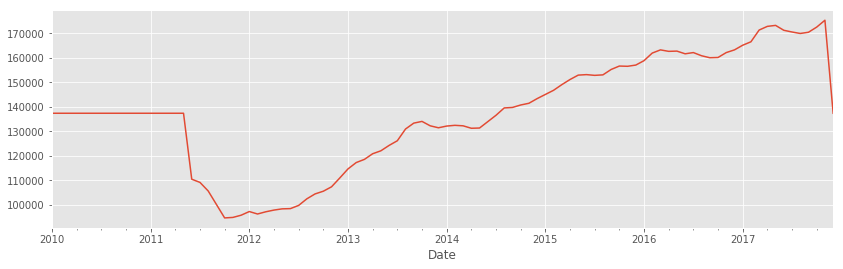

In [32]:
plt.figure(figsize=(14,4))
ts.plot()

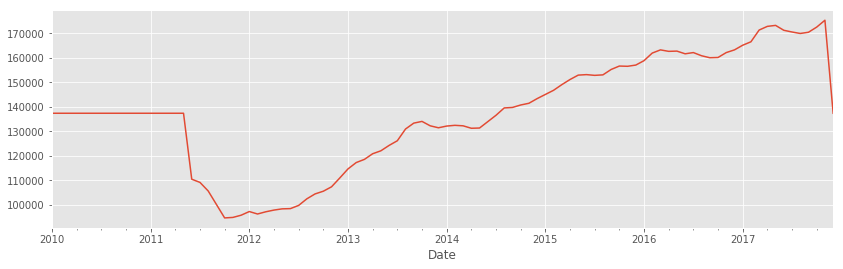

In [33]:
# Resample data by monthly
plt.figure(figsize=(14,4))
ts = ts.resample('M').mean()
ts.plot()

In [35]:
# forward fill for nan values
ts = ts.ffill()

Perfom Dickey fuller test
Test Statistic                 -1.079927
p-value                         0.723010
#Lags Used                      0.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


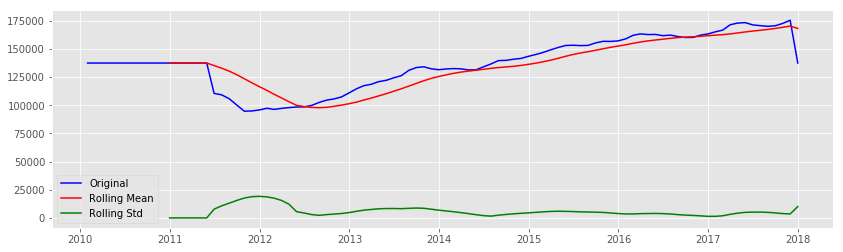

In [36]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(14,4))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(ts)

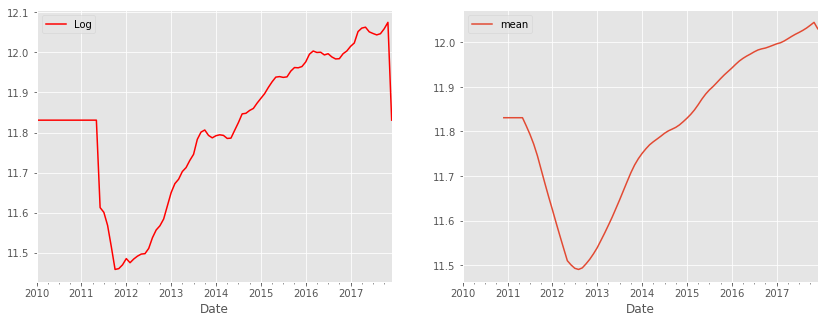

In [37]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

ts_log = np.log(ts)
ts_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

ts_ma = ts_log.rolling(12).mean()
ts_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')

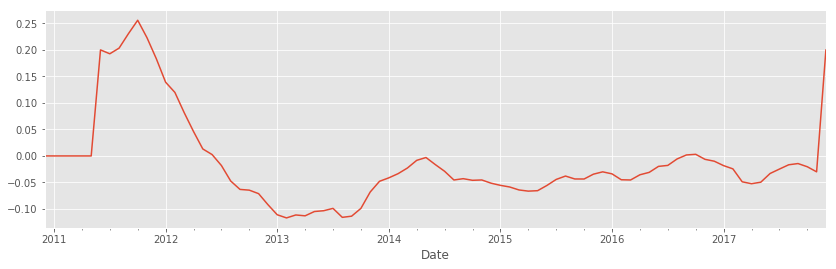

In [38]:
plt.figure(figsize=(14,4))
ts_dif = ts_ma - ts_log
ts_dif = ts_dif.dropna() # fill na
ts_dif.plot()

Perfom Dickey fuller test
Test Statistic                 -1.371925
p-value                         0.595659
#Lags Used                      1.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


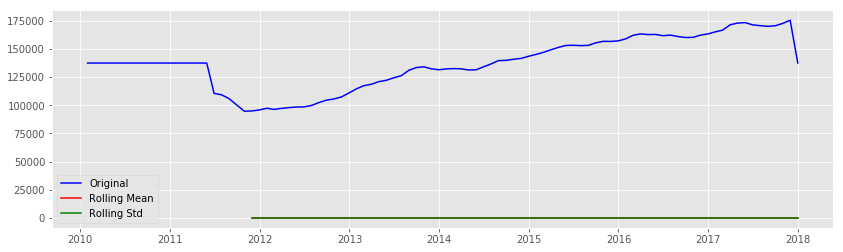

In [39]:
test_stationarity(ts_dif)

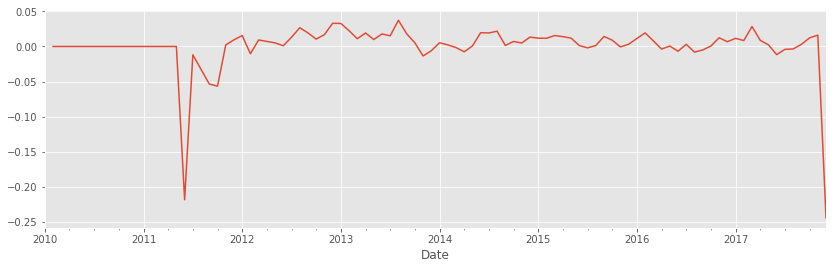

In [40]:
# Differencing
ts_log_dif = ts_log - ts_log.shift()
plt.figure(figsize=(14,4))
ts_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                -5.677749e+00
p-value                        8.626298e-07
#Lags Used                     0.000000e+00
Number of Observations Used    9.400000e+01
Critical Value (1%)           -3.501912e+00
Critical Value (5%)           -2.892815e+00
Critical Value (10%)          -2.583454e+00
dtype: float64


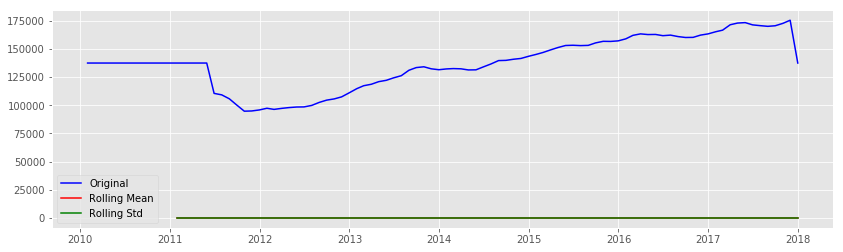

In [41]:
ts_log_dif.dropna(inplace = True)
test_stationarity(ts_log_dif)

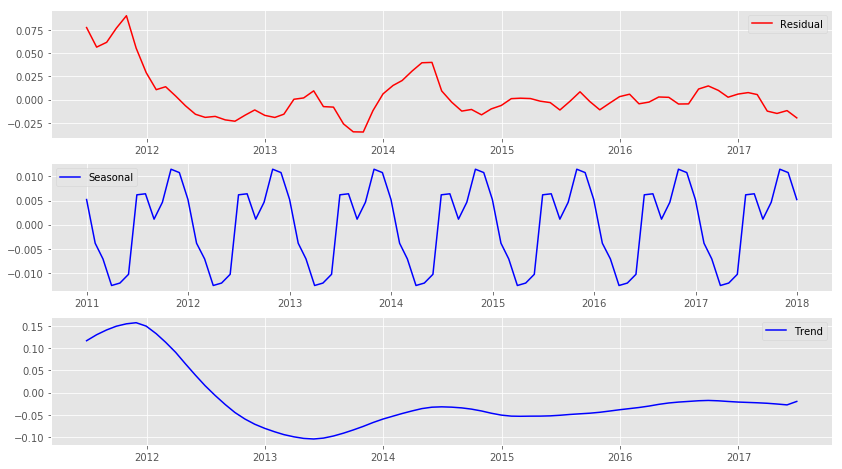

In [42]:
# Decomposing
docom = seasonal_decompose(ts_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')

In [43]:
# ACF
lag_acf = acf(ts_dif,nlags=20)
#PACF
lag_pacf = pacf(ts_dif, nlags=20, method='ols')

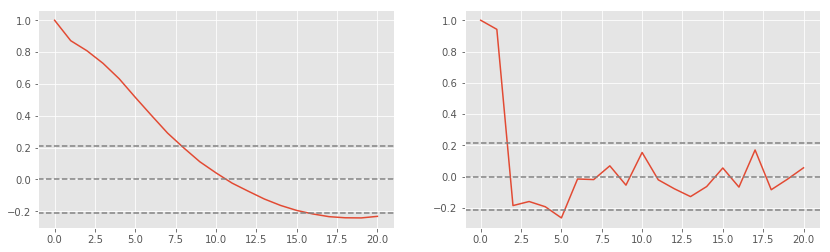

In [44]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')

In [ ]:
# the above graphs show that these should be the p and q values: p=7.5 q=1.5

                             ARIMA Model Results                              
Dep. Variable:          D.Sale_Prices   No. Observations:                   84
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 161.483
Method:                       css-mle   S.D. of innovations              0.035
Date:                Sat, 16 Nov 2019   AIC                           -306.966
Time:                        19:20:03   BIC                           -287.519
Sample:                    01-31-2011   HQIC                          -299.149
                         - 12-31-2017                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0041      0.006      0.639      0.525      -0.008       0.017
ar.L1.D.Sale_Prices    -0.7077      0.242     -2.920      0.005      -1.183      -0.233
ar.L2.D.Sale_Pri

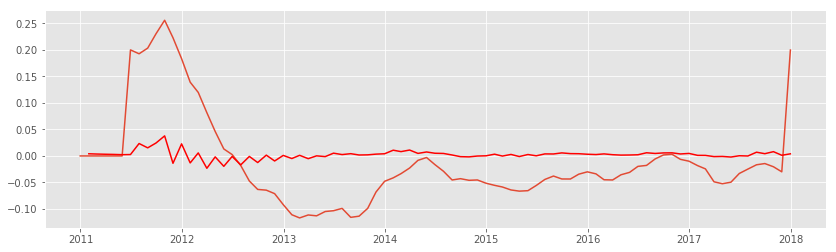

In [45]:
model = ARIMA(ts_dif, order = (5,1,1))
model_fit = model.fit(disp=5)
print(model_fit.summary())
plt.figure(figsize=(14,4))
plt.plot(ts_dif)
plt.plot(model_fit.fittedvalues,color = 'r')

In [46]:
# Grid search method
#Evaluate arima model for (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [47]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [48]:
# Evaluate parameter
p_value = range(0,2)
d_value = range(0,2)
q_value = range(0,2)
evaluate_models(ts,p_value,d_value,q_value,) 

ARIMA(0, 0, 0) MSE=998912613.382
ARIMA(0, 0, 1) MSE=299223112.316
ARIMA(0, 1, 0) MSE=46898886.039
ARIMA(0, 1, 1) MSE=47460390.075


/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning:

divide by zero encountered in true_divide

/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning:

invalid value encountered in true_divide

/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning:

invalid value encountered in true_divide

/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



ARIMA(1, 0, 0) MSE=46300414.792


/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning:

divide by zero encountered in true_divide

/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning:

invalid value encountered in true_divide

/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning:

invalid value encountered in true_divide



ARIMA(1, 1, 0) MSE=47786844.447
Best ARIMA(1, 0, 0) MSE=46300414.792
